In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

2024-04-22 01:37:05.365196: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 01:37:05.365319: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 01:37:05.519460: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/satellite-images-of-hurricane-damage/train_another/damage/-95.656807_29.835212.jpeg
/kaggle/input/satellite-images-of-hurricane-damage/train_another/damage/-95.630673_29.775671999999997.jpeg
/kaggle/input/satellite-images-of-hurricane-damage/train_another/damage/-95.639432_29.844975.jpeg
/kaggle/input/satellite-images-of-hurricane-damage/train_another/damage/-95.586533_29.757163000000002.jpeg
/kaggle/input/satellite-images-of-hurricane-damage/train_another/damage/-95.270494_29.60561.jpeg
/kaggle/input/satellite-images-of-hurricane-damage/train_another/damage/-93.975202_29.901428999999997.jpeg
/kaggle/input/satellite-images-of-hurricane-damage/train_another/damage/-97.001147_28.868156.jpeg
/kaggle/input/satellite-images-of-hurricane-damage/train_another/damage/-96.879051_28.499761.jpeg
/kaggle/input/satellite-images-of-hurricane-damage/train_another/damage/-96.97715600000001_28.500991.jpeg
/kaggle/input/satellite-images-of-hurricane-damage/train_another/damage/-95.138549_2

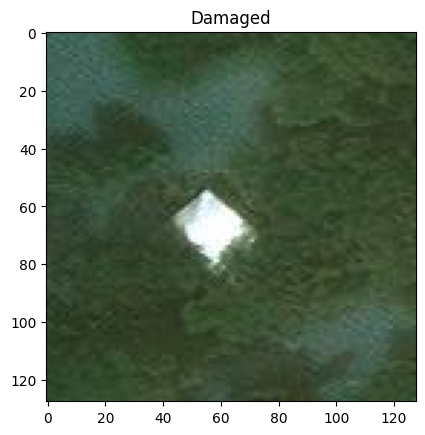

In [2]:
img = cv2.imread('/kaggle/input/satellite-images-of-hurricane-damage/train_another/damage/-93.55964_30.895018.jpeg')
plt.title('Damaged')
plt.imshow(img)

In [3]:
img.shape

(128, 128, 3)

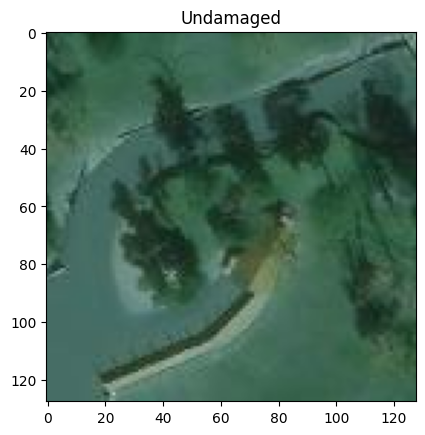

In [4]:
img = cv2.imread('/kaggle/input/satellite-images-of-hurricane-damage/train_another/no_damage/-95.061275_29.831535.jpeg')
plt.title('Undamaged')
plt.imshow(img)

In [5]:
test_another_dir = '/kaggle/input/satellite-images-of-hurricane-damage/test_another'
train_another_dir = '/kaggle/input/satellite-images-of-hurricane-damage/train_another'
test_dir = '/kaggle/input/satellite-images-of-hurricane-damage/test'
val_dir = '/kaggle/input/satellite-images-of-hurricane-damage/validation_another'
img_width = 100
img_height = 100

# Preparing the Train Data

In [6]:
categories = ['damage', 'no_damage']

# Now we get the images using complete path and store the images into img_data folder.
img_data = []
for cata in categories:
    folder = os.path.join(test_another_dir, cata)
    label = categories.index(cata)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)

        try:
            # Attempt to read and resize the image
            img_array = cv2.imread(img_path)
            img_array = cv2.resize(img_array, (img_height, img_width))

            # Check if the image array is not empty
            if img_array is not None and not img_array.size == 0:
                img_data.append([img_array, label])

        except Exception as e:
            continue

In [7]:
categories = ['damage', 'no_damage']

# Now we get the images using complete path and store the images into img_data folder.
for cata in categories:
    folder = os.path.join(train_another_dir, cata)
    label = categories.index(cata)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)

        try:
            # Attempt to read and resize the image
            img_array = cv2.imread(img_path)
            img_array = cv2.resize(img_array, (img_height, img_width))

            # Check if the image array is not empty
            if img_array is not None and not img_array.size == 0:
                img_data.append([img_array, label])

        except Exception as e:
            continue

In [8]:
random.shuffle(img_data)

In [9]:
x = []
y_t = []
for features,labels in img_data:
    x.append(features)
    y_t.append(labels)
    
#Convert X and Y list into array
x_train = np.array(x, dtype = float)
y_train = np.array(y_t)

In [10]:
x_train.shape

(19000, 100, 100, 3)

In [11]:
y_train.shape

(19000,)

In [12]:
x_train[10]

array([[[ 84., 114., 119.],
        [ 86., 116., 121.],
        [ 87., 117., 123.],
        ...,
        [ 84., 112., 119.],
        [ 86., 114., 121.],
        [ 87., 115., 122.]],

       [[ 87., 117., 122.],
        [ 84., 115., 119.],
        [ 83., 113., 118.],
        ...,
        [ 85., 113., 120.],
        [ 86., 114., 121.],
        [ 87., 115., 122.]],

       [[ 86., 116., 121.],
        [ 80., 110., 115.],
        [ 79., 109., 114.],
        ...,
        [ 88., 116., 123.],
        [ 86., 114., 121.],
        [ 84., 112., 119.]],

       ...,

       [[ 76., 107., 102.],
        [ 77., 109., 104.],
        [ 79., 110., 105.],
        ...,
        [ 83., 112., 117.],
        [ 84., 113., 118.],
        [ 85., 114., 119.]],

       [[ 73., 105., 100.],
        [ 75., 107., 102.],
        [ 77., 109., 104.],
        ...,
        [ 85., 114., 119.],
        [ 85., 114., 119.],
        [ 85., 114., 119.]],

       [[ 80., 112., 107.],
        [ 80., 112., 107.],
        [ 80., 1

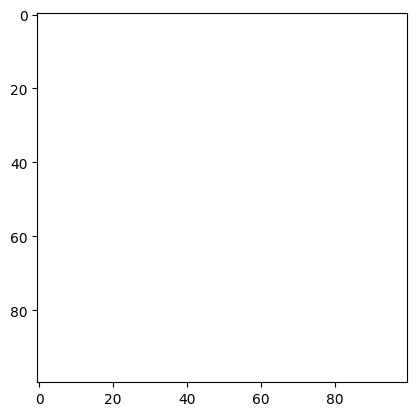

In [13]:
plt.imshow(x_train[10])

## Normalizing the values

In [14]:
for i in range(len(x_train)):
    x_train[i] /= 255

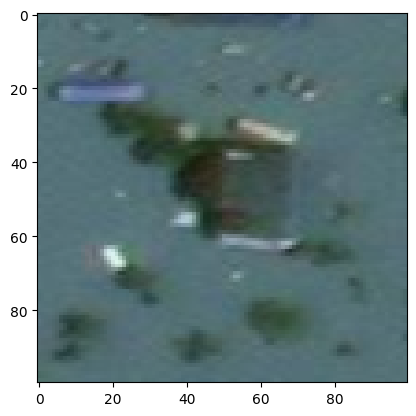

In [15]:
plt.imshow(x_train[10])

In [16]:
x_train[10]

array([[[0.32941176, 0.44705882, 0.46666667],
        [0.3372549 , 0.45490196, 0.4745098 ],
        [0.34117647, 0.45882353, 0.48235294],
        ...,
        [0.32941176, 0.43921569, 0.46666667],
        [0.3372549 , 0.44705882, 0.4745098 ],
        [0.34117647, 0.45098039, 0.47843137]],

       [[0.34117647, 0.45882353, 0.47843137],
        [0.32941176, 0.45098039, 0.46666667],
        [0.3254902 , 0.44313725, 0.4627451 ],
        ...,
        [0.33333333, 0.44313725, 0.47058824],
        [0.3372549 , 0.44705882, 0.4745098 ],
        [0.34117647, 0.45098039, 0.47843137]],

       [[0.3372549 , 0.45490196, 0.4745098 ],
        [0.31372549, 0.43137255, 0.45098039],
        [0.30980392, 0.42745098, 0.44705882],
        ...,
        [0.34509804, 0.45490196, 0.48235294],
        [0.3372549 , 0.44705882, 0.4745098 ],
        [0.32941176, 0.43921569, 0.46666667]],

       ...,

       [[0.29803922, 0.41960784, 0.4       ],
        [0.30196078, 0.42745098, 0.40784314],
        [0.30980392, 0

# Preparing the Test Data

In [17]:
categories = ['damage', 'no_damage']

# Now we get the images using complete path and store the images into img_data folder.
img_data = []
for cata in categories:
    folder = os.path.join(test_dir, cata)
    label = categories.index(cata)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)

        try:
            # Attempt to read and resize the image
            img_array = cv2.imread(img_path)
            img_array = cv2.resize(img_array, (img_height, img_width))

            # Check if the image array is not empty
            if img_array is not None and not img_array.size == 0:
                img_data.append([img_array, label])

        except Exception as e:
            continue

In [18]:
random.shuffle(img_data)

In [19]:
x=[]
y=[]
for features,labels in img_data:
    x.append(features)
    y.append(labels)
    
#Convert X and Y list into array
x_test = np.array(x, dtype = float)
y_test = np.array(y)

## Normalizing the values

In [20]:
for i in range(len(x_test)):
    x_test[i] /= 255

# Preparing the Validation Data

In [21]:
categories = ['damage', 'no_damage']

# Now we get the images using complete path and store the images into img_data folder.
img_data = []
for cata in categories:
    folder = os.path.join(val_dir, cata)
    label = categories.index(cata)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)

        try:
            # Attempt to read and resize the image
            img_array = cv2.imread(img_path)
            img_array = cv2.resize(img_array, (img_height, img_width))

            # Check if the image array is not empty
            if img_array is not None and not img_array.size == 0:
                img_data.append([img_array, label])

        except Exception as e:
            continue

In [22]:
random.shuffle(img_data)

In [23]:
x=[]
y=[]
for features,labels in img_data:
    x.append(features)
    y.append(labels)
    
#Convert X and Y list into array
x_val = np.array(x, dtype = float)
y_val = np.array(y)

## Normalizing the values

In [24]:
for i in range(len(x_val)):
    x_val[i] /= 255

# Modeling the CNN

In [25]:
model = Sequential()

In [26]:
model.add(Conv2D(256, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = x_train.shape[1:]))
model.add(AveragePooling2D(2,2))
model.add(Conv2D(256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(Conv2D(256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(Conv2D(128, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(3500, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(2000, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

In [27]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 100, 256)  │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 50, 50, 256)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 25, 25, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 25, 25, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3500)           │    64,515,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2000)           │     7,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         2,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,149,453 (279.04 MB)

 Trainable params: 73,149,453 (279.04 MB)

 Non-trainable params: 0 (0.00 B)

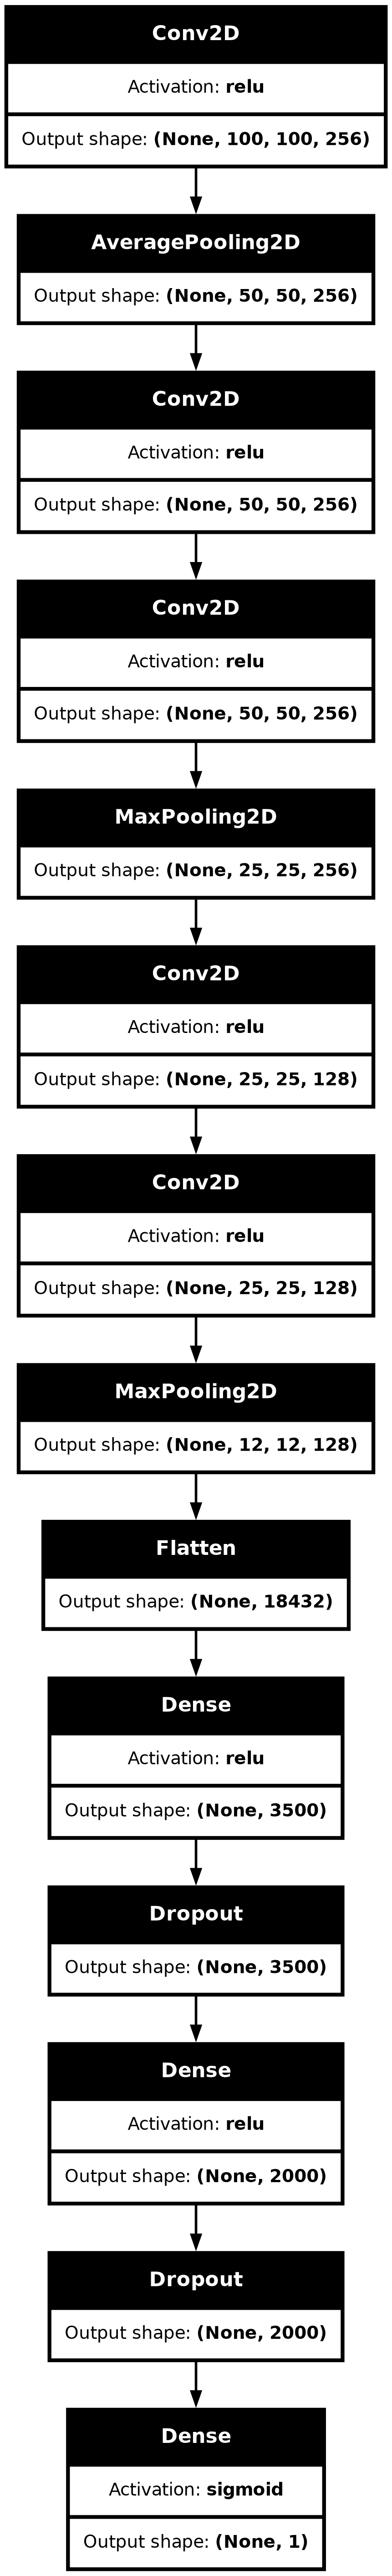

In [29]:
plot_model(model, to_file = 'Model Image.png', show_shapes = True, show_layer_activations = True)

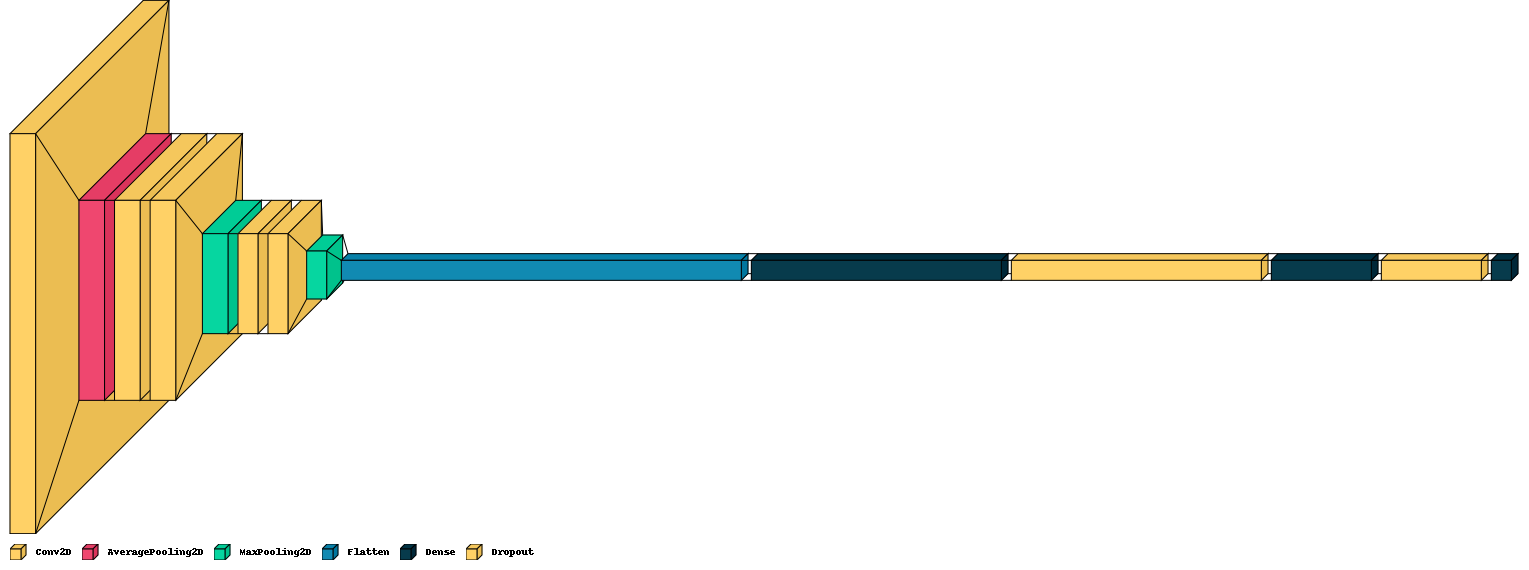

In [30]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 5)

Epoch 1/5
  1/594 ━━━━━━━━━━━━━━━━━━━━ 3:23:00 21s/step - accuracy: 0.4062 - loss: 0.6956

I0000 00:00:1713749969.329639      77 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


594/594 ━━━━━━━━━━━━━━━━━━━━ 98s 130ms/step - accuracy: 0.6751 - loss: 0.6592 - val_accuracy: 0.5000 - val_loss: 0.7866
Epoch 2/5
  1/594 ━━━━━━━━━━━━━━━━━━━━ 1:07 114ms/step - accuracy: 0.6250 - loss: 0.6740

W0000 00:00:1713750046.740528      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


594/594 ━━━━━━━━━━━━━━━━━━━━ 59s 99ms/step - accuracy: 0.6846 - loss: 0.6247 - val_accuracy: 0.5000 - val_loss: 0.7544
Epoch 3/5
594/594 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.6825 - loss: 0.6263 - val_accuracy: 0.5000 - val_loss: 0.7789
Epoch 4/5
594/594 ━━━━━━━━━━━━━━━━━━━━ 60s 100ms/step - accuracy: 0.6874 - loss: 0.6222 - val_accuracy: 0.5000 - val_loss: 0.7950
Epoch 5/5
594/594 ━━━━━━━━━━━━━━━━━━━━ 60s 101ms/step - accuracy: 0.6896 - loss: 0.6215 - val_accuracy: 0.5000 - val_loss: 0.7510


In [31]:
model.evaluate(x_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5040 - loss: 0.7486


[0.7506647706031799, 0.5]

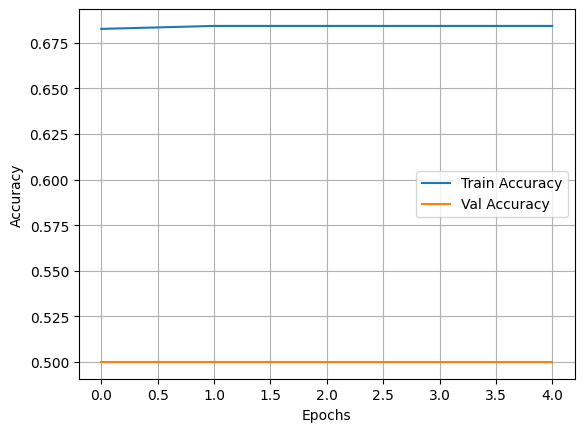

In [32]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.grid()
plt.legend(loc = 'best')

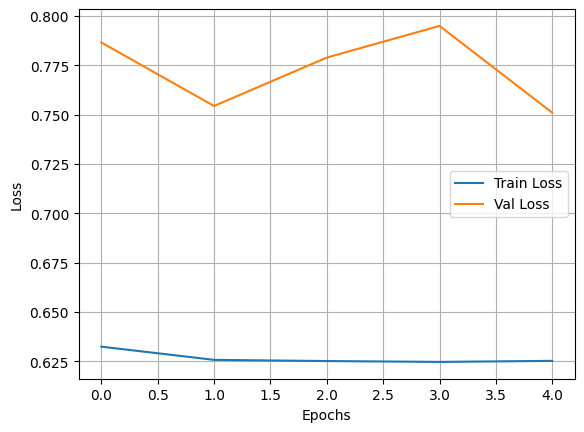

In [33]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.grid()
plt.legend(loc = 'best')

In [34]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Define ground truth labels and model predictions
ground_truth = np.array([1, 0, 1, 0, 1])  # Example ground truth labels (1 for damaged, 0 for undamaged)
predictions = np.array([1, 0, 1, 1, 0])    # Example model predictions

# Calculate evaluation metrics
accuracy = accuracy_score(ground_truth, predictions)
precision = precision_score(ground_truth, predictions)
recall = recall_score(ground_truth, predictions)
f1 = f1_score(ground_truth, predictions)
auc = roc_auc_score(ground_truth, predictions)
conf_matrix = confusion_matrix(ground_truth, predictions)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.6
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1 Score: 0.6666666666666666
AUC Score: 0.5833333333333333
Confusion Matrix:
[[1 1]
 [1 2]]


In [35]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Define the model
model = Sequential()
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
model.add(AveragePooling2D(2, 2))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(3500, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(2000, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    validation_data=(x_val, y_val),
                    epochs=5,
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)


Epoch 1/5
594/594 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.6749 - loss: 1.4170

W0000 00:00:1713750398.738472      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


594/594 ━━━━━━━━━━━━━━━━━━━━ 85s 125ms/step - accuracy: 0.6749 - loss: 1.4160 - val_accuracy: 0.6925 - val_loss: 0.6303 - learning_rate: 0.0010
Epoch 2/5
594/594 ━━━━━━━━━━━━━━━━━━━━ 65s 109ms/step - accuracy: 0.7953 - loss: 0.4762 - val_accuracy: 0.8885 - val_loss: 0.2992 - learning_rate: 0.0010
Epoch 3/5
594/594 ━━━━━━━━━━━━━━━━━━━━ 65s 109ms/step - accuracy: 0.9056 - loss: 0.2824 - val_accuracy: 0.9030 - val_loss: 0.2738 - learning_rate: 0.0010
Epoch 4/5
594/594 ━━━━━━━━━━━━━━━━━━━━ 66s 110ms/step - accuracy: 0.9204 - loss: 0.2448 - val_accuracy: 0.9125 - val_loss: 0.2511 - learning_rate: 0.0010
Epoch 5/5
594/594 ━━━━━━━━━━━━━━━━━━━━ 82s 110ms/step - accuracy: 0.9298 - loss: 0.2279 - val_accuracy: 0.9235 - val_loss: 0.2213 - learning_rate: 0.0010
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9089 - loss: 0.2390
Test Accuracy: 0.9114999771118164


In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image data generators with rescaling
datagen = ImageDataGenerator(rescale=1./255)

# Define batch size
batch_size = 32

# Load and preprocess training data
train_generator = datagen.flow_from_directory(
    train_another_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load and preprocess validation data
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load and preprocess test data
test_generator = datagen.flow_from_directory(
    test_another_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)



Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 9000 images belonging to 2 classes.
Epoch 1/15
  5/313 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.5859 - loss: 0.8531

W0000 00:00:1713750698.318564      78 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


112/313 ━━━━━━━━━━━━━━━━━━━━ 15s 79ms/step - accuracy: 0.6143 - loss: 0.6731

W0000 00:00:1713750706.898013      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7097 - loss: 0.5637

W0000 00:00:1713750715.038135      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 64ms/step - accuracy: 0.7106 - loss: 0.5624 - val_accuracy: 0.9005 - val_loss: 0.2574 - learning_rate: 0.0010
Epoch 2/15


W0000 00:00:1713750718.252233      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.9142 - loss: 0.2138 - val_accuracy: 0.9450 - val_loss: 0.1360 - learning_rate: 0.0010
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9421 - loss: 0.1474 - val_accuracy: 0.9390 - val_loss: 0.1495 - learning_rate: 0.0010
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.9565 - loss: 0.1150 - val_accuracy: 0.9480 - val_loss: 0.1330 - learning_rate: 0.0010
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.9602 - loss: 0.1062 - val_accuracy: 0.9525 - val_loss: 0.1299 - learning_rate: 0.0010
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.9707 - loss: 0.0788 - val_accuracy: 0.9485 - val_loss: 0.1251 - learning_rate: 0.0010
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9656 - loss: 0.0931 - val_accuracy: 0.9470 - val_loss: 0.1286 - learning_rate: 0.0010
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9788 - loss: 0.0566

W0000 00:00:1713750922.965033      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


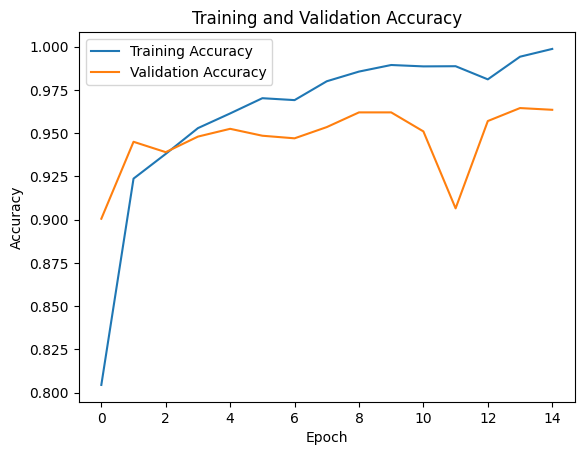

In [37]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


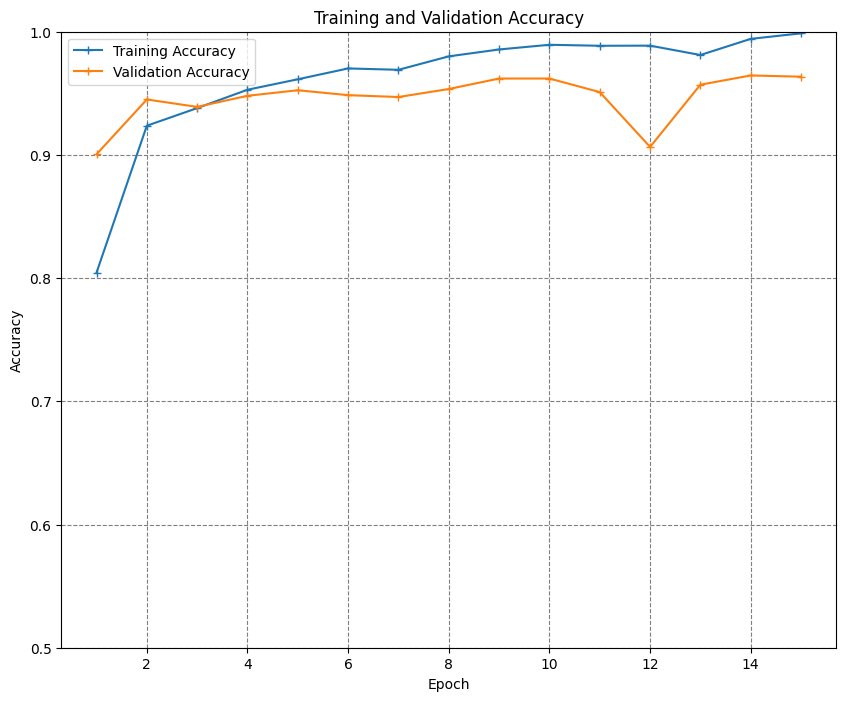

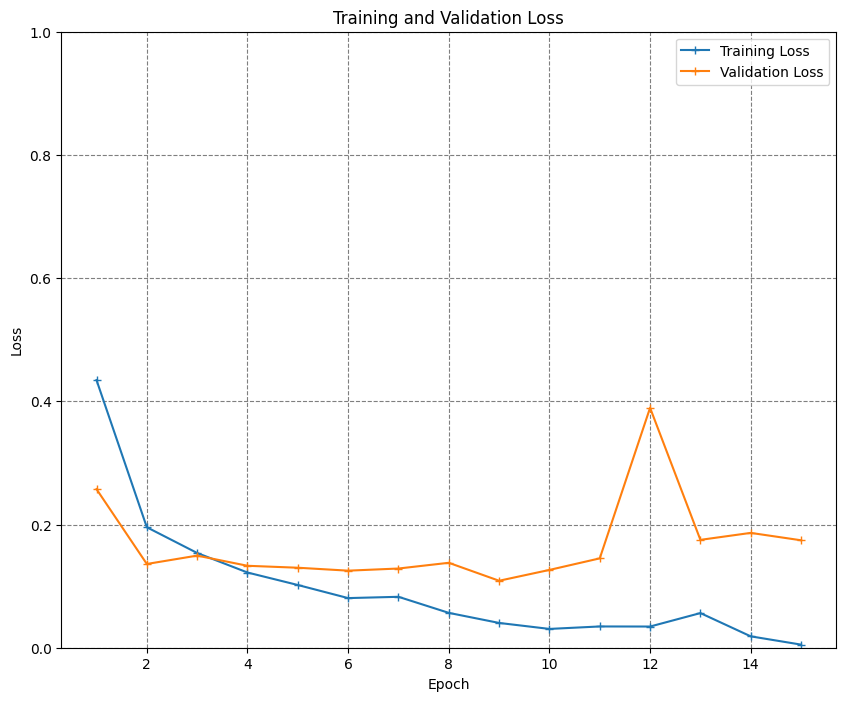

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(acc) + 1), acc, '+-', label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, '+-', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(ls='--', c='C7')
plt.ylim(0.5, 1)  # Adjust the y-axis limits if needed
plt.show()

# Plot loss
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(loss) + 1), loss, '+-', label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, '+-', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(ls='--', c='C7')
plt.ylim(0, 1)  # Adjust the y-axis limits if needed
plt.show()